In [ ]:
import piplite
await piplite.install('seaborn')

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

C:\Users\Abdulrhman Alsir\AppData\Local\Temp\ipykernel_15956\3259198522.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [2]:
filepath="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [7]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Manufacturer', 'Category', 'GPU', 'OS',
       'CPU_core', 'Screen_Size_inch', 'CPU_frequency', 'RAM_GB',
       'Storage_GB_SSD', 'Weight_pounds', 'Price', 'Price-binned',
       'Screen-Full_HD', 'Screen-IPS_panel'],
      dtype='object')

In [11]:
df.head(5)

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


(0.0, 3974.15)

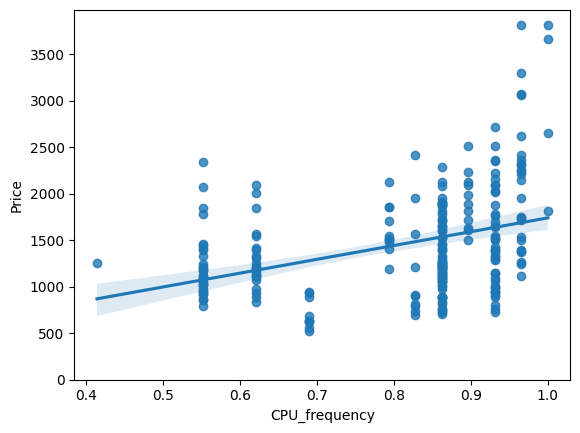

In [16]:
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

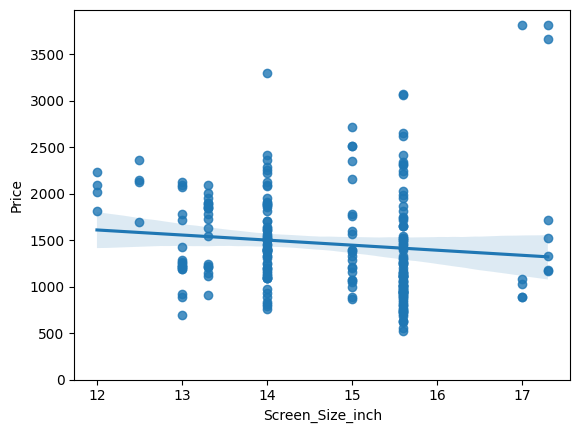

In [18]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

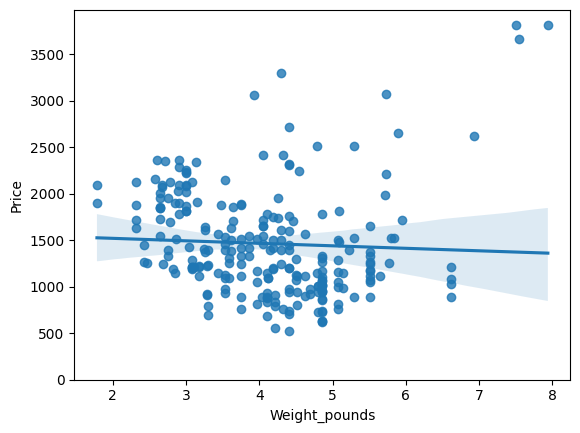

In [20]:
sns.regplot(x='Weight_pounds', y='Price', data=df)
plt.ylim(0,)

In [25]:
for param in ['CPU_frequency', 'Screen_Size_inch', 'Weight_pounds']:
    print(f'The Correlation of Price and {param} is:', df[[param, 'Price']].corr())

The Correlation of Price and CPU_frequency is:                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
The Correlation of Price and Screen_Size_inch is:                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
The Correlation of Price and Weight_pounds is:                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


<Axes: xlabel='Category', ylabel='Price'>

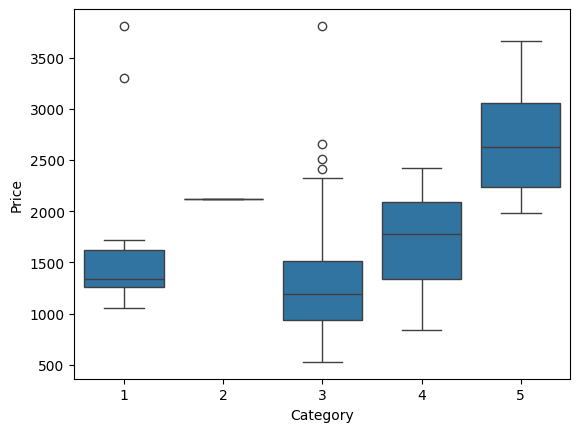

In [27]:
sns.boxplot(x=df['Category'], y= df['Price'])

<Axes: xlabel='GPU', ylabel='Price'>

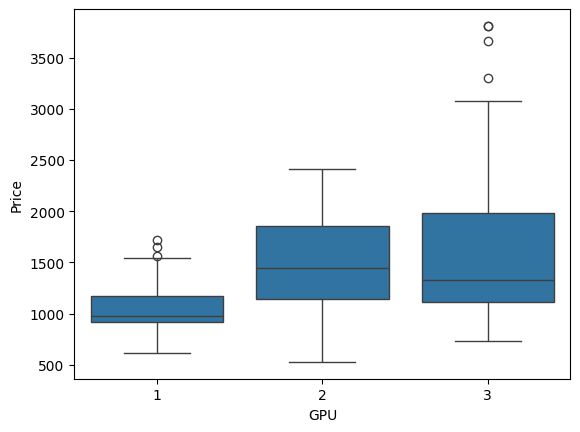

In [28]:
sns.boxplot(x=df["GPU"], y= df['Price'])

<Axes: xlabel='OS', ylabel='Price'>

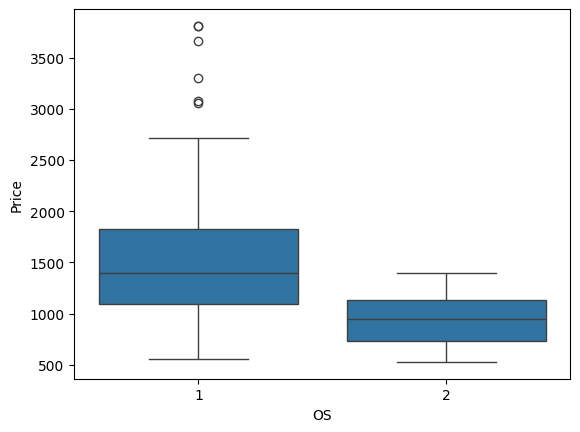

In [29]:
sns.boxplot(x=df["OS"], y=df['Price'])

<Axes: xlabel='CPU_core', ylabel='Price'>

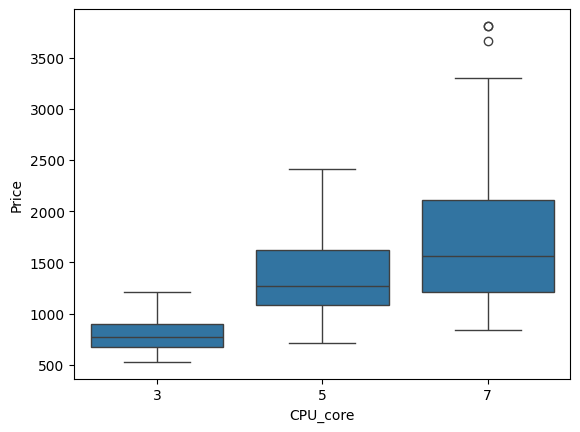

In [30]:
sns.boxplot(x=df["CPU_core"], y=df['Price'])

<Axes: xlabel='RAM_GB', ylabel='Price'>

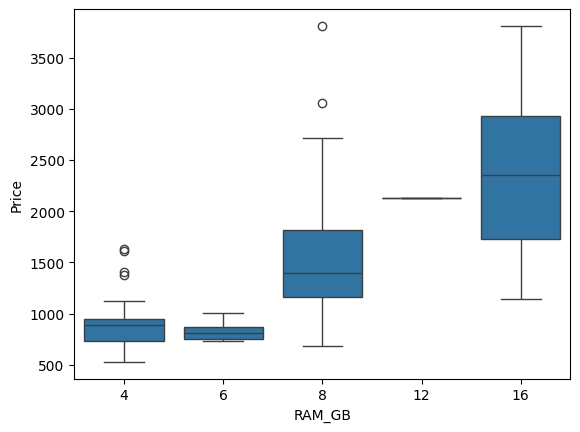

In [31]:
sns.boxplot(x=df["RAM_GB"], y=df['Price'])

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

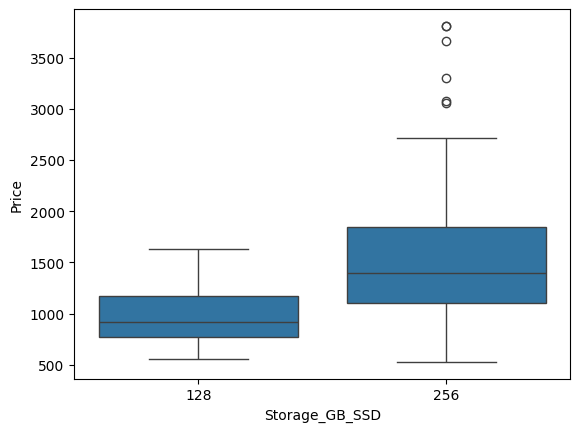

In [32]:
sns.boxplot(x=df["Storage_GB_SSD"], y=df['Price'])

In [39]:
df.describe(include=['object'])
df.describe()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [43]:
df_group = df[["GPU", "CPU_core", 'Price']]
df_group = df_group.groupby(["GPU", "CPU_core"], as_index=False).mean()
df_group

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [46]:
group_pivot = df_group.pivot(index='GPU', columns='CPU_core')
group_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

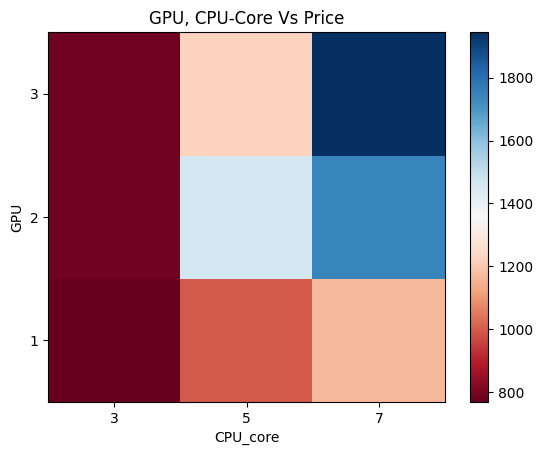

In [62]:
fig, ax = plt.subplots()
lm = ax.pcolor(group_pivot, cmap='RdBu')

row = group_pivot.columns.levels[1]
col = group_pivot.index

ax.set_xticks(np.arange(group_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(group_pivot.shape[0]) + 0.5, minor=False)

ax.set_xticklabels(row, minor=False)
ax.set_yticklabels(col, minor=False)

plt.xlabel('CPU_core')
plt.ylabel('GPU')
plt.title('GPU, CPU-Core Vs Price')
fig.colorbar(lm)
plt.show()


In [63]:
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for", param, "is", pearson_coef, " with a P-value of P =", round(p_value, 5))

RAM_GB
The Pearson Correlation Coefficient for RAM_GB is 0.5492972971857842  with a P-value of P = 0.0
CPU_frequency
The Pearson Correlation Coefficient for CPU_frequency is 0.3666655589258861  with a P-value of P = 0.0
Storage_GB_SSD
The Pearson Correlation Coefficient for Storage_GB_SSD is 0.24342075521810297  with a P-value of P = 0.00015
Screen_Size_inch
The Pearson Correlation Coefficient for Screen_Size_inch is -0.11064420817118267  with a P-value of P = 0.08853
Weight_pounds
The Pearson Correlation Coefficient for Weight_pounds is -0.05031225837751548  with a P-value of P = 0.43977
CPU_core
The Pearson Correlation Coefficient for CPU_core is 0.45939777733551157  with a P-value of P = 0.0
OS
The Pearson Correlation Coefficient for OS is -0.22172980114827395  with a P-value of P = 0.00057
GPU
The Pearson Correlation Coefficient for GPU is 0.2882981988881427  with a P-value of P = 1e-05
Category
The Pearson Correlation Coefficient for Category is 0.28624275581264147  with a P-value